# Naive Bayes Classification Model for Salary Data

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Loading the datasets
train_df=pd.read_csv('C:/Data Science/Assignments/Naive Bayes/SalaryData_Train.csv')
test_df=pd.read_csv('C:/Data Science/Assignments/Naive Bayes/SalaryData_Test.csv')

In [3]:
train_df.head()
train_df.shape

(30161, 14)

In [4]:
test_df.head()
test_df.shape

(15060, 14)

In [6]:
#Now combine train and test data into one dataset
big_df=train_df.append(test_df,sort=False)
big_df.tail()
big_df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
big_df.shape

(45221, 14)

In [8]:
big_df.info

<bound method DataFrame.info of        age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
15055   33            Private   Bachelors           13        Never-married   
15056   39            Private   Bachelors           13             Divorced   
15057   38            Private   Bachelors           13   Married-civ-spouse   
15058   44            Private   Bachelors           13             Divorced   
15059   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occu

#Feature Engineering and Feature Selection

In [9]:
#Descriptive Statistics
big_df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Feature Engineering - Check for Null missing values
#Check for N/A Values
#big_df.isnull().sum()
big_df.isnull().any()
#Filling all missing values with 0
big_df = big_df.fillna(0)

In [11]:
X = big_df.iloc[:,0:12].values
Y = big_df.iloc[:,13].values
print(X[0:5,])

[[39 ' State-gov' ' Bachelors' 13 ' Never-married' ' Adm-clerical'
  ' Not-in-family' ' White' ' Male' 2174 0 40]
 [50 ' Self-emp-not-inc' ' Bachelors' 13 ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' 0 0 13]
 [38 ' Private' ' HS-grad' 9 ' Divorced' ' Handlers-cleaners'
  ' Not-in-family' ' White' ' Male' 0 0 40]
 [53 ' Private' ' 11th' 7 ' Married-civ-spouse' ' Handlers-cleaners'
  ' Husband' ' Black' ' Male' 0 0 40]
 [28 ' Private' ' Bachelors' 13 ' Married-civ-spouse' ' Prof-specialty'
  ' Wife' ' Black' ' Female' 0 0 40]]


In [12]:
# let's see how many unique categories we have in this property
salary_set = set(big_df['Salary'])
print(salary_set)

{' <=50K', ' >50K'}


In [13]:
# Just transforming Slary to category 0 and 1.
big_df['Salary'] = big_df['Salary'].map({' <=50K': 0, ' >50K': 1}).astype(int)
#Check for missing values
#big_df['Salary'].isnull().any()

False

In [14]:
big_df.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,1


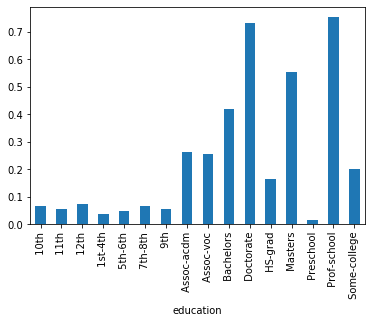

In [15]:
#Plot of Salary V/s Education
big_df.groupby('education').Salary.mean().plot(kind='bar')
#As we can observe, this parameter has significance over Salary

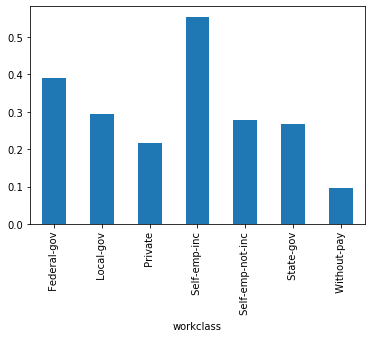

In [16]:
#Plot of Salary V/s workclass
big_df.groupby('workclass').Salary.mean().plot(kind='bar')
#As we can observe, this parameter has significance over Salary

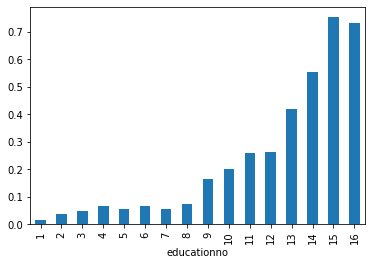

In [17]:
#Plot of Salary V/s no of years of education
big_df.groupby('educationno').Salary.mean().plot(kind='bar')
#As we can observe, as no of years of education increases, salary also increases

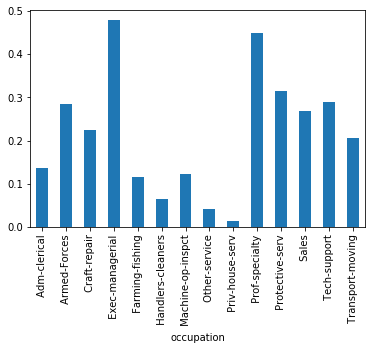

In [18]:
#Plot of Salary V/s no of years of education
big_df.groupby('occupation').Salary.mean().plot(kind='bar')
#As we can observe, occupation is significant

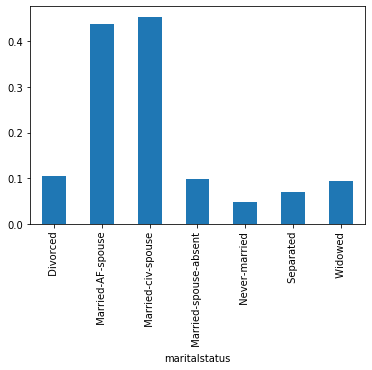

In [20]:
#Plot of Salary V/s no of years of education
big_df.groupby('maritalstatus').Salary.mean().plot(kind='bar')
#As we can observe, this parameter is significant, salary is more for Married

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005AC68A0608>,
      dtype=object)

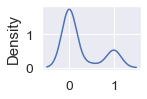

In [68]:
#Density Plot of Capitalloss and Capital gain
#big_df.groupby('capitalgain').Salary.mean().plot(kind='density', subplots=True, layout=(3,3), sharex=True, legend=False)
# density
big_df.groupby('capitalloss').Salary.mean().plot(kind='density', subplots=True, layout=(3,3), sharex=True, legend=False)

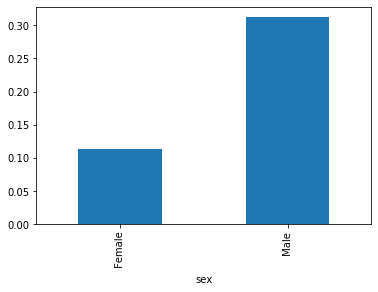

In [24]:
#Plot of Salary V/s sex
big_df.groupby('sex').Salary.mean().plot(kind='bar')
#As we can observe, this parameter has significance over Salary

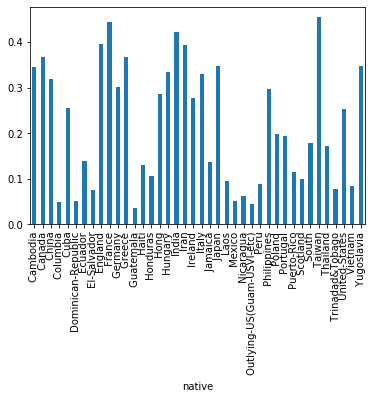

In [25]:
#Plot of Salary v/s native
big_df.groupby('native').Salary.mean().plot(kind='bar')
#As we can observe, there is not much significance of Native over Salary, we remove this

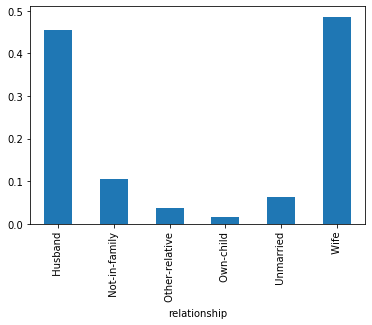

In [26]:
#Plot of Salary over relationship
big_df.groupby('relationship').Salary.mean().plot(kind='bar')
#This parameter is significant

In [28]:
# Let's see how many unique categories we have in this property - occupation
occupation_set = set(big_df['occupation'])
print(occupation_set)

{' Armed-Forces', ' Craft-repair', ' Farming-fishing', ' Priv-house-serv', ' Adm-clerical', ' Machine-op-inspct', ' Sales', ' Transport-moving', ' Protective-serv', ' Other-service', ' Handlers-cleaners', ' Exec-managerial', ' Tech-support', ' Prof-specialty'}


In [29]:
# Now we classify them as numbers instead of their names.
big_df['occupation'] = big_df['occupation'].map({'?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, 
                                                       ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5,
                                                       ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, 
                                                       ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, 
                                                       ' Protective-serv': 11, ' Sales': 12, ' Tech-support': 13, 
                                                       ' Transport-moving': 14}).astype(int)

In [30]:
# Let's see how many unique categories we have in this property
workclass_set = set(big_df['workclass'])
print(workclass_set)

{' Local-gov', ' State-gov', ' Private', ' Without-pay', ' Federal-gov', ' Self-emp-inc', ' Self-emp-not-inc'}


In [31]:
# Now we classify them as numbers instead of their names.
big_df['workclass'] = big_df['workclass'].map({' State-gov': 0, ' Self-emp-not-inc': 1, 
                                                       ' Federal-gov': 2, ' Self-emp-inc': 3, ' Local-gov': 4,
                                                       ' Private': 5, ' Without-pay': 6}).astype(int)

In [11]:
# Let's see how many unique categories we have in this property - native
native_set = set(big_df['native'])
print(native_set)

{' South', ' Canada', ' Greece', ' Honduras', ' Cuba', ' Guatemala', ' Yugoslavia', ' Ireland', ' Puerto-Rico', ' Taiwan', ' Laos', ' Germany', ' India', ' Philippines', ' El-Salvador', ' Peru', ' Hong', ' Italy', ' Ecuador', ' Hungary', ' Trinadad&Tobago', ' Iran', ' Japan', ' Vietnam', ' Portugal', ' France', ' Mexico', ' Jamaica', ' Columbia', ' Outlying-US(Guam-USVI-etc)', ' China', ' Nicaragua', ' Haiti', ' Scotland', ' United-States', ' Cambodia', ' Thailand', ' Poland', ' England', ' Dominican-Republic'}


In [32]:
# Let's see how many unique categories we have in this property
education_set = set(big_df['education'])
print(education_set)

{' 9th', ' Doctorate', ' 11th', ' Assoc-acdm', ' Some-college', ' 7th-8th', ' Preschool', ' Assoc-voc', ' Prof-school', ' HS-grad', ' 12th', ' 10th', ' Bachelors', ' Masters', ' 1st-4th', ' 5th-6th'}


In [33]:
# Now we classify them as numbers instead of their names.
big_df['education'] = big_df['education'].map({' Assoc-voc': 0, ' 1st-4th': 1, 
                                                       ' Doctorate': 2, ' HS-grad': 3, ' 9th': 4,
                                                       ' Preschool': 5, ' Bachelors': 6, 
                                                       ' 11th': 7, ' Some-college': 8, ' 10th': 9, 
                                                       ' Prof-school': 10, ' 12th': 11, ' Masters': 12, 
                                                       ' Assoc-acdm': 13, ' 7th-8th':14, ' 5th-6th':15}).astype(int)

In [34]:
# Again, let's see how many unique categories we have in this property
sex_set = set(big_df['sex'])
print(sex_set)

{' Male', ' Female'}


In [35]:
# Transforming the Sex into 0 and 1
big_df['sex'] = big_df['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [36]:
big_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,6,13,Never-married,1,Not-in-family,White,0,2174,0,40,United-States,0
1,50,1,6,13,Married-civ-spouse,4,Husband,White,0,0,0,13,United-States,0
2,38,5,3,9,Divorced,6,Not-in-family,White,0,0,0,40,United-States,0
3,53,5,7,7,Married-civ-spouse,6,Husband,Black,0,0,0,40,United-States,0
4,28,5,6,13,Married-civ-spouse,10,Wife,Black,1,0,0,40,Cuba,0


In [37]:
# How many unique races we got here?
race_set = set(big_df['race'])
print(race_set)

{' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' White', ' Other', ' Black'}


In [38]:
big_df['race'] = big_df['race'].map({' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, 
                                             ' Other': 4}).astype(int)

In [39]:
# What about maritial status?
mstatus_set = set(big_df['maritalstatus'])
print(mstatus_set)

{' Separated', ' Widowed', ' Married-civ-spouse', ' Married-AF-spouse', ' Never-married', ' Divorced', ' Married-spouse-absent'}


In [40]:
big_df['maritalstatus'] = big_df['maritalstatus'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3,' Divorced': 4, 
                                                            ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [41]:
# What about relationship?
relation_set = set(big_df['relationship'])
print(relation_set)

{' Not-in-family', ' Husband', ' Unmarried', ' Other-relative', ' Own-child', ' Wife'}


In [42]:
big_df['relationship'] = big_df['relationship'].map({' Unmarried': 0, ' Not-in-family': 1, 
                                               ' Other-relative': 2, ' Own-child': 3,
                                               ' Husband': 4, ' Wife': 5}).astype(int)

In [43]:
big_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,6,13,5,1,1,0,0,2174,0,40,United-States,0
1,50,1,6,13,2,4,4,0,0,0,0,13,United-States,0
2,38,5,3,9,4,6,1,0,0,0,0,40,United-States,0
3,53,5,7,7,2,6,4,1,0,0,0,40,United-States,0
4,28,5,6,13,2,10,5,1,1,0,0,40,Cuba,0


In [44]:
big_df.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,4.214900,6.144933,10.118463,3.228257,6.969572,2.640256,0.211207,0.324938,1101.454700,88.548617,40.938038,0.247849
std,13.217981,1.515595,3.494616,2.552909,1.439844,4.026444,1.576767,0.612882,0.468357,7506.511295,404.838249,12.007640,0.431769
min,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,3.000000,9.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,5.000000,6.000000,10.000000,2.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,5.000000,8.000000,13.000000,5.000000,10.000000,4.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


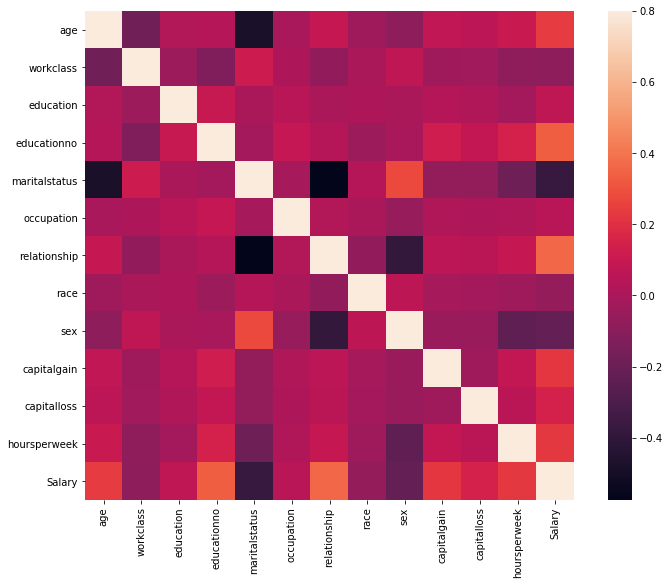

In [46]:
#Build correlation matrix
corrmat = big_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

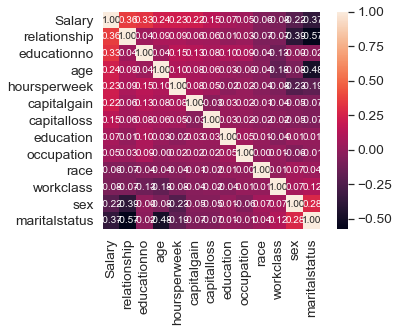

In [48]:
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(big_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [56]:
#Data Standardization, # Rescale data (between 0 and 1)
#Transform features by scaling each feature to a given range (0,1)
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

array = big_df.values
# separate array into input and output components
X = big_df.iloc[:,0:12].values
Y = big_df.iloc[:,13].values

# Do a train test split of transformed dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

columns_names = ['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary']

#Standardize the dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

# summarize transformed data
set_printoptions(precision=3)
print(X_train[0:5,:])
print(X_test[0:5,:])


[[0.301 0.5   0.2   0.533 0.333 0.231 0.8   0.    0.    0.    0.    0.398]
 [0.397 0.5   0.667 0.933 0.333 0.692 0.8   0.    0.    1.    0.    0.602]
 [0.397 0.833 0.667 0.933 0.333 0.692 0.8   0.    0.    1.    0.    0.5  ]
 [0.247 0.833 0.533 0.6   0.    0.    0.2   0.25  1.    0.    0.    0.398]
 [0.438 0.833 0.133 1.    0.333 0.692 0.8   1.    0.    0.    0.    0.5  ]]
[[0.164 0.833 0.667 0.933 0.833 0.692 0.4   0.    0.    0.    0.    0.5  ]
 [0.123 0.833 0.4   0.8   0.833 0.    0.6   0.    1.    0.    0.    0.398]
 [0.178 0.833 0.4   0.8   0.833 0.    0.6   0.    0.    0.    0.587 0.398]
 [0.452 0.833 0.2   0.533 0.333 1.    0.8   0.    0.    0.    0.    0.398]
 [0.37  0.833 0.467 0.4   0.833 0.462 0.    0.25  1.    0.    0.    0.398]]


In [57]:
#####################################################
# Feature Importance with Extra Trees Classifier Method
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)
#Based on feature importance, I select all features

[0.229 0.044 0.033 0.104 0.09  0.093 0.101 0.021 0.026 0.098 0.033 0.127]


In [61]:
#Model Building - Gaussian NB#
###############################
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sgnb = GaussianNB()
spred_gnb = sgnb.fit(X_train,y_train).predict(X_test)
cn = confusion_matrix(y_test,spred_gnb)
print(cn)
#get Model Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, spred_gnb)
print("Gaussian NB Model Accuracy", accuracy)

#Accuracy is 80.7%

[[9697  532]
 [2078 1260]]
Gaussian NB Model Accuracy 0.8076214343627921
Accuracy 0.8076214343627921


In [62]:
#Model Building - MultinomialNB ####
from sklearn.naive_bayes import MultinomialNB

smnb = MultinomialNB()
spred_mnb = smnb.fit(X_train,y_train)
predict = spred_mnb.predict(X_test)
cn = confusion_matrix(y_test,predict)
print(cn)
accuracy = accuracy_score(y_test, predict)
print(accuracy)
#print("Accuracy",(10891+780)/(10891+780+2920+780))  # 75%
#Accuracy is 76%

[[10223     6]
 [ 3240    98]]
0.7607429792879782
